import package

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

read the data

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
print(f"X_train shape : {X_train.shape} ")

X_train shape : (60000, 28, 28) 


In [8]:
print(f"X_test shape : {X_test.shape} ")

X_test shape : (10000, 28, 28) 


In [9]:
print(f"y_train shape : {y_train.shape} ")

y_train shape : (60000,) 


In [10]:
print(f"y_test shape : {y_test.shape} ")

y_test shape : (10000,) 


8
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


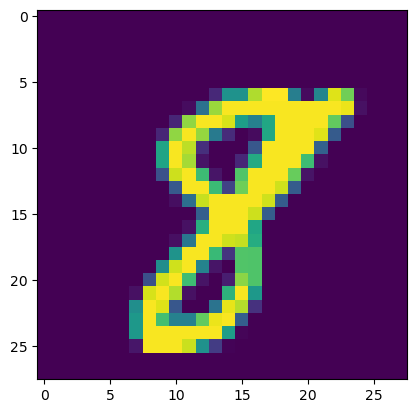

In [15]:
print(y_train[55])
print("_-_-"*10)

plt.imshow(X_train[55])

In [16]:
X_train.ndim

3

flatten images into one-dimensional vector

In [17]:
n_pixels=X_train.shape[1]*X_train.shape[2]

In [18]:
n_pixels #28*28

784

In [19]:
X_train=X_train.reshape(X_train.shape[0],n_pixels).astype("float32")
X_test=X_test.reshape(X_test.shape[0],n_pixels).astype("float32")

normalize input

In [23]:
print(X_test.max())
print(X_test.min())

255.0
0.0


In [24]:
X_train=X_train/255
X_test=X_test/255

Convert the target variable to categories

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
print(f"y_train shape : {y_train.shape} ")

y_train shape : (60000, 10) 


In [27]:
print(f"y_test shape : {y_test.shape} ")

y_test shape : (10000, 10) 


In [28]:
n_cls=y_test.shape[1] #10
print(n_cls)

10


Build a Neural Network

In [29]:
def mnis_cls():
    model=Sequential()
    model.add(Dense(n_pixels,activation="relu",input_shape=(n_pixels,)))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(n_cls,activation="softmax"))
    
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    return model

Train and Test

In [30]:
model=mnis_cls()

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,verbose=2)

Epoch 1/15
1875/1875 - 22s - loss: 0.1859 - accuracy: 0.9438 - val_loss: 0.1015 - val_accuracy: 0.9676 - 22s/epoch - 11ms/step
Epoch 2/15
1875/1875 - 19s - loss: 0.0763 - accuracy: 0.9757 - val_loss: 0.0818 - val_accuracy: 0.9761 - 19s/epoch - 10ms/step
Epoch 3/15
1875/1875 - 19s - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.0744 - val_accuracy: 0.9786 - 19s/epoch - 10ms/step
Epoch 4/15
1875/1875 - 17s - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0676 - val_accuracy: 0.9801 - 17s/epoch - 9ms/step
Epoch 5/15
1875/1875 - 18s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0708 - val_accuracy: 0.9807 - 18s/epoch - 9ms/step
Epoch 6/15
1875/1875 - 18s - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0651 - val_accuracy: 0.9830 - 18s/epoch - 9ms/step
Epoch 7/15
1875/1875 - 19s - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0765 - val_accuracy: 0.9812 - 19s/epoch - 10ms/step
Epoch 8/15
1875/1875 - 19s - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0712 - val_accuracy: 0.9828 - 19s/epoch

evaluate the model

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9811


[0.10951408743858337, 0.9811000227928162]

Save the model

In [33]:
model.save("mnist_model.h5")

C:\Users\Bandar Tarasheh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Load the model

In [34]:
from keras.models import load_model

In [35]:
Mnist_Model=load_model("mnist_model.h5")

predict

In [38]:
Mnist_Model.predict(X_test[[369]])

1/1 [==============================] - 0s 30ms/step


array([[4.9810658e-15, 1.7877930e-11, 6.7681182e-12, 9.9999583e-01,
        7.8776775e-15, 2.6024025e-09, 1.0030903e-23, 3.2499253e-12,
        2.3743891e-11, 4.1982826e-06]], dtype=float32)

In [39]:
Mnist_Model.predict(X_test[[369]]).argmax()

1/1 [==============================] - 0s 29ms/step


3

In [46]:
print(y_test[369])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
